# Time Series Learning tasks

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
# from sktime.performance_metrics.forecasting import smape_loss
# from sktime.utils.plotting.forecasting import plot_ys



%matplotlib inline

### How to Check if there is Seasonality in the time series data

In [2]:
from sktime.utils.seasonality import autocorrelation_seasonality_test

In [4]:
y =load_airline()

In [5]:
autocorrelation_seasonality_test(y,sp=5)

True

### K-means in Time Series

In [6]:
### If there is seasonality in the TSA data, we can actually carry out K-means clustering
### Similar to that of the sklearn
### This will enable us group a particular trend together in the time series data
### Which will enable traditional forecasting of when similar trend will happen

from sktime.clustering.k_means import TimeSeriesKMeans

In [7]:
TimeSeriesKMeans=TimeSeriesKMeans()

## 7 steps to Carryout Time Series on any data set

In [107]:
### 1 Get your data
### 2 Specify Forecasting Horizon
### 3 Get your Time series model
### 4 Train your model
### 5 Predict with the model
### 6 Score the model
### 7 Optimize and Repeat (optional but necessary)
### 8 Plot your data (optional but necessary)

### 1) Get your data

### Loading data Sets from Sktime Library

In [9]:
y =load_airline()

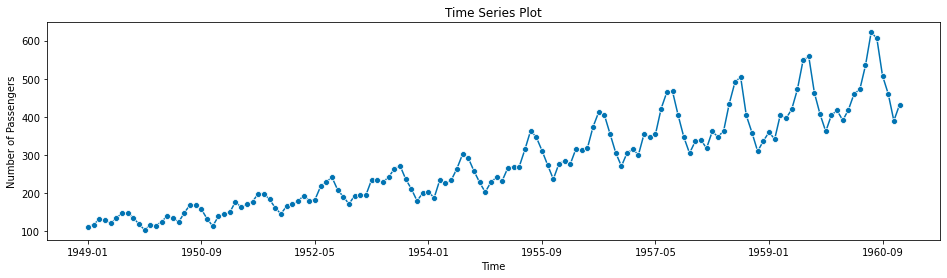

In [10]:
### Plotting the data

fig,ax=plot_series(y)
ax.set(xlabel='Time',ylabel='Number of Passengers', title='Time Series Plot');

### Splitting our data into train and Test in TS

108 36


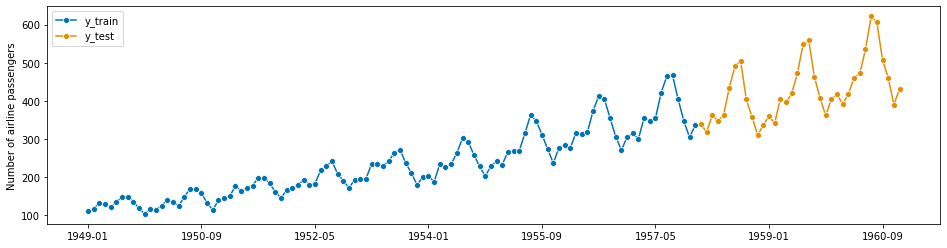

In [11]:
### This is very similar to the train test split in sklearn but requires shuffle=False
### To prevent Data Leakage

y_train, y_test=temporal_train_test_split(y, test_size=36)
plot_series(y_train,y_test, labels=["y_train","y_test"])
print(y_train.shape[0],y_test.shape[0])

In [12]:
y_train.shape

(108,)

## 2 Specifying Forecast Horizon

In [13]:
from sktime.forecasting.base import ForecastingHorizon

In [14]:
#### There are 2 types of forecasting Horizon
### Absolute and Relative

In [90]:
### Absolute Forecasting Horizon
abfh1=ForecastingHorizon(pd.PeriodIndex(pd.date_range('1958-01',periods=36,freq='M')),is_relative=False)
abfh1

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

In [91]:
## Another way

abfh2= ForecastingHorizon(y_test.index,is_relative=False,freq="M")
abfh2

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

In [92]:
### Relative forecasting Horizon
### We will need to specify the cutoff to convert from absolute relative

In [93]:
## First way
rtfh1=abfh.to_relative(y_test.index[0])
rtfh1

ForecastingHorizon([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64', is_relative=True)

In [94]:
## Another way
cutoff=pd.Period("1958-01", freq='M')
rtfh2=abfh.to_relative(cutoff)
rtfh2

ForecastingHorizon([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35],
           dtype='int64', is_relative=True)

In [95]:
## Another way

fh =np.arange(1,37)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

## 3 Specifying Forecasting algorithm

In [63]:
### Lets use a random forecasting model
### We will explore more below

from sktime.forecasting.naive import NaiveForecaster

In [64]:
forecaster=NaiveForecaster(strategy='last')

## 4 Fitting the forecaster to the data

In [65]:
forecaster.fit(y_train)

NaiveForecaster()

## 5 Predicting with the model

In [104]:
y_pred=forecaster.predict(fh)

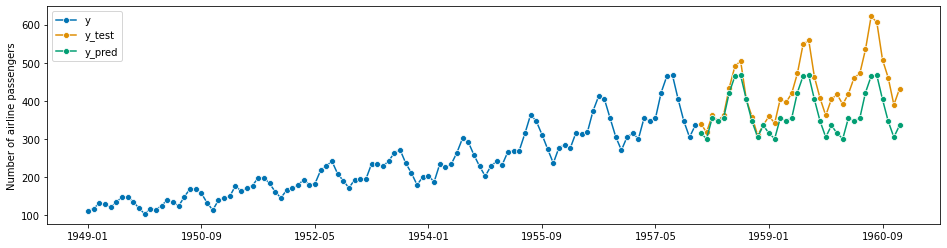

In [105]:
plot_series(y_train,y_test,y_pred,labels=['y','y_test','y_pred']);

## 6 Score the Model

In [108]:
## Score the model means checking the accuracy of the model
## There are different metrics for it but we will use MAPE

In [109]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [111]:
mean_absolute_percentage_error(y_test,y_pred)

## 13% Accuracry
## The smaller the value, the better

0.13189432350948402

## General Overview

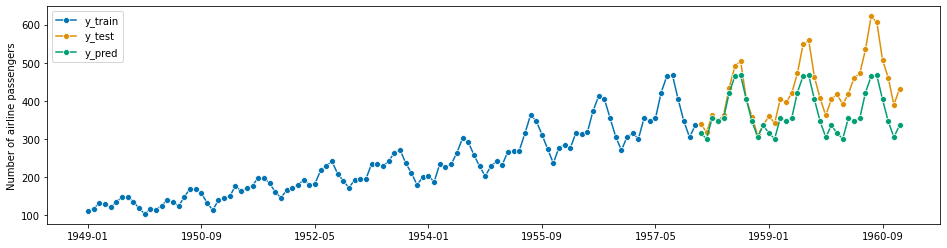

In [112]:
## Step1
y=load_airline()
## Step 2
fh =np.arange(1,37)
## Step 3
forecaster=NaiveForecaster(strategy='last',sp=12)
## Step 4
forecaster.fit(y_train)
## Step 5
y_pred=forecaster.predict(fh)
plot_series(y_train,y_test,y_pred,labels=['y_train','y_test','y_pred']);

## Special Case Scenerio

#### Forecaster that require the horizon already in fit

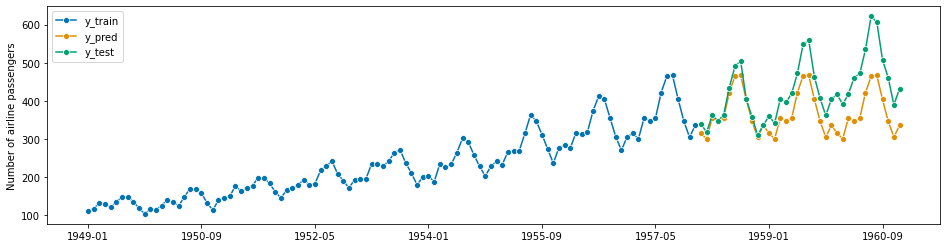

In [114]:
### Some forecasting models actually allow the forecasting horizon fit in the 'fit' method
### Rather than passing it through the predict method

y=load_airline()
fh =np.arange(1,37)
forecaster=NaiveForecaster(strategy='last',sp=12)
forecaster.fit(y_train, fh=fh)
y_pred=forecaster.predict()
plot_series(y_train,y_pred,y_test,labels=['y_train','y_pred','y_test']);

#### Exogenous time series

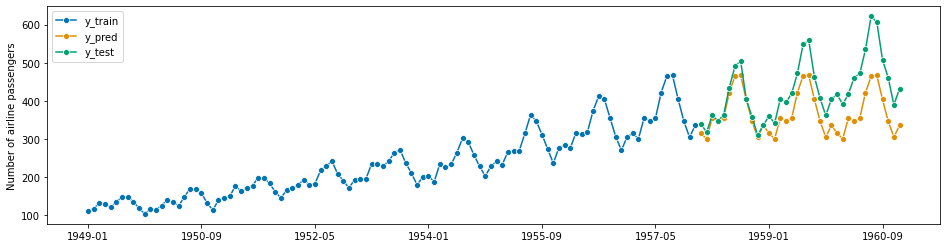

In [115]:
## Exogenous data are data that can support the model in helping to predict the target variable
## They are usually passed in the fit method
## Similar to features in the sklearn, they aid the model in predicting the target variable
## And they must be of the panda dataframe type

y=load_airline()
X=pd.DataFrame(index=y.index)
fh =np.arange(1,37)
forecaster=NaiveForecaster(strategy='last',sp=12)
forecaster.fit(y_train,X=X, fh=fh)
y_pred=forecaster.predict(X=X)
plot_series(y_train,y_pred,y_test,labels=['y_train','y_pred','y_test']);

#### Multivariate Forecasting

In [117]:
## We have earlier done univariate analysis
## Multivariate involves forecasting more than one variable
## There are but a few models best suited for multivariate analysis
## Lets run through and see

from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

In [119]:
_, y=load_longley()
y.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
Period,,,,,
1947,83.0,234289.0,2356.0,1590.0,107608.0
1948,88.5,259426.0,2325.0,1456.0,108632.0
1949,88.2,258054.0,3682.0,1616.0,109773.0
1950,89.5,284599.0,3351.0,1650.0,110929.0
1951,96.2,328975.0,2099.0,3099.0,112075.0


In [120]:
y=y.drop(columns=['UNEMP','ARMED','POP'])
y_train, y_test=temporal_train_test_split(y, test_size=3)
forecaster=VAR()
forecaster.fit(y_train,fh=[1,2,3])
y_pred=forecaster.predict()

In [121]:
y_pred.head()

,GNPDEFL,GNP
1960,115.146867,501826.988738
1961,117.257912,520929.346540
1962,119.400292,539803.137730


In [36]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [122]:
mean_absolute_percentage_error(y_test,y_pred)

0.012866667295917933

In [38]:
y_pred

,GNPDEFL,GNP
1960,115.146867,501826.988738
1961,117.257912,520929.346540
1962,119.400292,539803.137730


In [39]:
y_test

,GNPDEFL,GNP
Period,,
1960,114.2,502601.0
1961,115.7,518173.0
1962,116.9,554894.0


### Prediction Intervals

In [127]:
## This produces interval forecasts, it helps give a range within where our forecasts could fall
## Lets take a look at how it works
## First lets get the important lib

import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.model_selection import temporal_train_test_split

In [128]:
y= load_airline()
fh =np.arange(1,13)
y_train,y_test= temporal_train_test_split(y, test_size=36)
forecaster=ThetaForecaster(sp=12)
forecaster.fit(y_train, fh=fh)

ThetaForecaster(sp=12)

In [129]:
## The predict interval takes an arguement which is the 'coverage'
## The coverage specifies the nominal coverage of the prediction intervals

coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

Coverage            
                0.9            
              lower       upper
1958-01  324.325612  358.587233
1958-02  316.811104  358.318220
1958-03  364.296235  411.959877
1958-04  346.069496  399.180745
1958-05  342.857666  400.907530
1958-06  390.252168  452.852239
1958-07  428.250945  495.092181
1958-08  422.236683  493.065582
1958-09  369.832253  444.435972
1958-10  315.774550  393.971078
1958-11  268.433002  350.064362
1958-12  308.826997  393.754384

In [130]:
y_test.head()

Period
1958-01    340.0
1958-02    318.0
1958-03    362.0
1958-04    348.0
1958-05    363.0
Freq: M, Name: Number of airline passengers, dtype: float64

#### Plotting then Periodic interval forecast

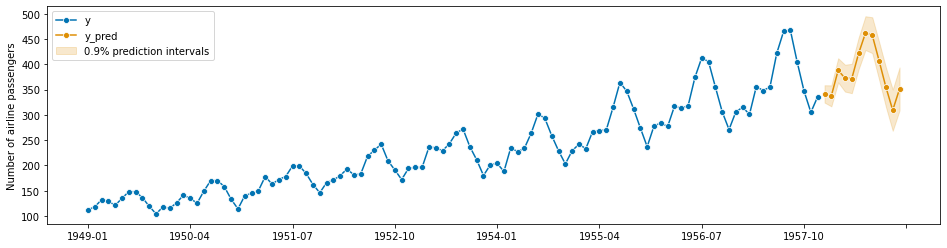

In [133]:
from sktime.utils import plotting

y_pred = forecaster.predict()

fig,ax =plotting.plot_series(y_train,y_pred,labels=["y","y_pred"])
ax.fill_between(ax.get_lines()[-1].get_xdata(),
                y_pred_ints["Coverage"][coverage]["lower"],
                y_pred_ints["Coverage"][coverage]["upper"],
                alpha=0.2, color=ax.get_lines()[-1].get_c(),
                label=f"{coverage}% prediction intervals",)
ax.legend();

## Now we can see the prediction interval

### Getting Infomation of our time series Model

In [138]:
from sktime.forecasting.arima import ARIMA,AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster,ExponentialSmoothing

In [139]:
## Using get_tags method will give you an explicit information of the model you want to use
## if it will be best suited for the time series problem handling


AutoARIMA().get_tags()

{'scitype:y': 'univariate',
 'ignores-exogeneous-X': False,
 'capability:pred_int': True,
 'handles-missing-data': True,
 'y_inner_mtype': 'pd.Series',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None,
 'python_dependencies': 'pmdarima'}

In [140]:
ARIMA().get_tags()

{'scitype:y': 'univariate',
 'ignores-exogeneous-X': False,
 'capability:pred_int': True,
 'handles-missing-data': True,
 'y_inner_mtype': 'pd.Series',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None,
 'python_dependencies': 'pmdarima'}

In [141]:
ThetaForecaster().get_tags()

{'scitype:y': 'univariate',
 'ignores-exogeneous-X': True,
 'capability:pred_int': True,
 'handles-missing-data': False,
 'y_inner_mtype': 'pd.Series',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None}

In [142]:
ExponentialSmoothing().get_tags()

{'scitype:y': 'univariate',
 'ignores-exogeneous-X': True,
 'capability:pred_int': False,
 'handles-missing-data': False,
 'y_inner_mtype': 'pd.Series',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None}

### Printing all the time series model

In [146]:
from sktime.registry import all_estimators,all_tags

In [144]:
### ALl the time series Model in a dataframe format

all_estimators(as_dataframe=True)

,name,estimator
0,ARDL,<class 'sktime.forecasting.ardl.ARDL'>
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
2,AggrDist,<class 'sktime.dists_kernels.compose_tab_to_pa...
3,Aggregator,<class 'sktime.transformations.hierarchical.ag...
4,AlignerDTW,<class 'sktime.alignment.dtw_python.AlignerDTW'>
...,...,...
224,WEASEL,<class 'sktime.classification.dictionary_based...
225,WeightedEnsembleClassifier,<class 'sktime.classification.compose._ensembl...
226,WhiteNoiseAugmenter,<class 'sktime.transformations.series.augmente...
227,WindowSummarizer,<class 'sktime.transformations.series.summariz...


In [145]:
## We can as well filter on the all estimators functions
## To get the exact one you want

all_estimators(as_dataframe=True,filter_tags={"scitype:y":["multivariate"]})

,name,estimator
0,DynamicFactor,<class 'sktime.forecasting.dynamic_factor.Dyna...
1,VAR,<class 'sktime.forecasting.var.VAR'>
2,VARMAX,<class 'sktime.forecasting.varmax.VARMAX'>
3,VECM,<class 'sktime.forecasting.vecm.VECM'>
